In [1]:
using TSSM
include("time_stepper.jl");

WF= WfFourier1D T= Float64 common
WF= WfFourier2D T= Float64 common
WF= WfFourier3D T= Float64 common
WF= WfFourierReal1D T= Float64 common
WF= WfFourierReal2D T= Float64 common
WF= WfFourierReal3D T= Float64 common
WF= WfSchroedinger1D T= Float64 common
WF= WfSchroedinger2D T= Float64 common
WF= WfSchroedinger3D T= Float64 common
WF= WfSchroedingerReal1D T= Float64 common
WF= WfSchroedingerReal2D T= Float64 common
WF= WfSchroedingerReal3D T= Float64 common
WF= WfSchroedinger1D T= Float64 (schroedinger_common)
WF= WfSchroedinger2D T= Float64 (schroedinger_common)
WF= WfSchroedinger3D T= Float64 (schroedinger_common)
WF= WfSchroedingerReal1D T= Float64 (schroedinger_common)
WF= WfSchroedingerReal2D T= Float64 (schroedinger_common)
WF= WfSchroedingerReal3D T= Float64 (schroedinger_common)
 *** SERIAL (no MPI/OPENMP)


In [2]:
cubic_coupling = -1.0
xmin=-16.0
xmax=16.0
Nx=1024

m=Schroedinger1D(Nx,xmin, xmax,cubic_coupling=cubic_coupling)

TSSM.Schroedinger1D{Float64}(Ptr{Void} @0x00000000036dd190)

In [3]:
psi=wave_function(m)

TSSM.WfSchroedinger1D{Float64}(Ptr{Void} @0x00000000036418d0,TSSM.Schroedinger1D{Float64}(Ptr{Void} @0x00000000036dd190))

In [4]:
const a=[2.0, 2.0,  0.0,  0.0] #aplitude
const b=[1.0,-3.0,  1.0, -9.0] #speed
const c=[5.0,-5.0,  0.0, -10.0] #offset x

function soliton(x)
    (a[1]/cosh(a[1]*(x-c[1]))) * exp(-b[1]*x*1im)+
    (a[2]/cosh(a[2]*(x-c[2]))) * exp(-b[2]*x*1im)+
    (a[3]/cosh(a[3]*(x-c[3]))) * exp(-b[3]*x*1im)+
    (a[4]/cosh(a[4]*(x-c[4]))) * exp(-b[4]*x*1im)
end

soliton (generic function with 1 method)

In [5]:
palindromic_scheme_34 = PalindromicScheme( 
          ( 0.268330095781759925,  0.919661523017399857, 
           -0.187991618799159782, -0.187991618799159782, 
            0.919661523017399857,  0.268330095781759925 ),
            3 )

palindromic_scheme_56 = PalindromicScheme(
          ( 0.201651044312324230,   0.578800656272664932, 
            0.562615975356569200,   0.273128836056524479, 
            0.253874038247554845,  -0.102733803148432142, 
           -0.835351693190370636,   0.068014946093165092, 
            0.068014946093165092,  -0.835351693190370636,
           -0.102733803148432142,   0.253874038247554845, 
            0.273128836056524479,   0.562615975356569200, 
            0.578800656272664932,   0.201651044312324230 ),            
            5 )

PalindromicScheme((0.20165104431232422,0.578800656272665,0.5626159753565692,0.2731288360565245,0.25387403824755483,-0.10273380314843214,-0.8353516931903706,0.0680149460931651,0.0680149460931651,-0.8353516931903706,-0.10273380314843214,0.25387403824755483,0.2731288360565245,0.5626159753565692,0.578800656272665,0.20165104431232422),5)

In [6]:
x = get_nodes(m);
to_real_space!(psi);
u = get_data(psi, true);

get_nodes T=Float64


In [7]:
  tend=10.0
  t0=0.0
  out=1
  tol=1e-8

1.0e-8

In [10]:
set!(psi, soliton)

plotdata=abs(u).^2
steps=[0.0]
mytime=[0.0]
told=0.0
nsteps=0


@time  for t in adaptive_time_stepper(psi, t0, tend, 0.01, tol, palindromic_scheme_56, "AB")
       #readline(STDIN)
      push!(steps,t-told)
      push!(mytime,t)
      told=t
      nsteps=nsteps+1
  
      if out==1
      to_real_space!(psi)
        plotdata = [plotdata abs(u).^2]
         #@printf("t=%5.3f\n", t)
         #figure(2)
         #hold(false)
         #plot(x, abs(u).^2)
         #hold(true)
      end
  end


  2.716071 seconds (70.76 k allocations: 3.199 GB, 3.48% gc time)


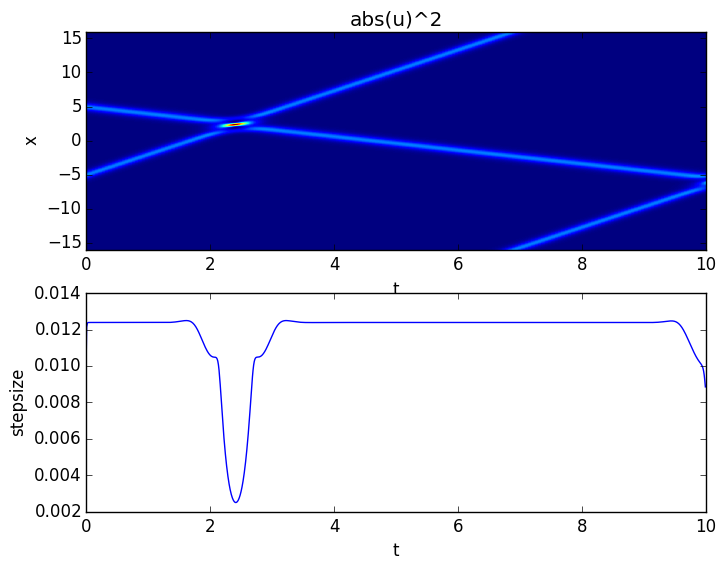

In [11]:
  using PyPlot
  figure(1)
  hold(false)
  if out==1
  subplot(2, 1, 1)
  pcolormesh(mytime,x,plotdata)
  xlabel("t")
  ylabel("x")
  #colorbar()
  axis([t0,tend,xmin,xmax])
  title("abs(u)^2")

  subplot(2, 1, 2)
  end
  plot(mytime[1:end-2], steps[2:end-1])
  xlabel("t")
  ylabel("stepsize")
  savefig("step.png", bbox_inches="tight")
  #colorbar( )